In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## LOAD DATASET


In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\phyllis\Documents\E-Commerce Sales Analysis and Customer Insights\archive (4)\data.csv", encoding='latin1')


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### DATA CLEANING 

In [6]:
##CHECK MISSONG VALUES
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
##drop rows with missing customer ids
df = df.dropna(subset=['CustomerID'])

In [8]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace from column names

In [9]:
df['invoice_date'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [10]:
##key columns
df['TotalPrice'] = df['Quantity']* df['UnitPrice']

### EXPLORATORY DATA ANALYSIS


In [11]:
##TOP 10 SELLING PRODUCT
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

In [12]:
##revenue per country
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_revenue.head(10))

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


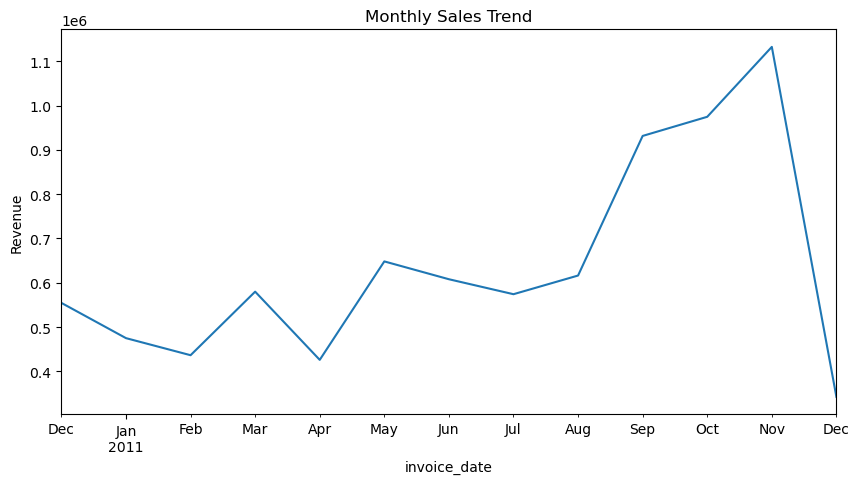

In [14]:
##sales over time
df.set_index('invoice_date')['TotalPrice'].resample('M').sum().plot(kind='line', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.show()

### CUSTOMER SEGMENTATION (RFM ANALYSIS)


In [17]:
#set snapshot date
snapshot_date = df['invoice_date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'invoice_date': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={'invoice_date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


### VISUALIZATION

c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


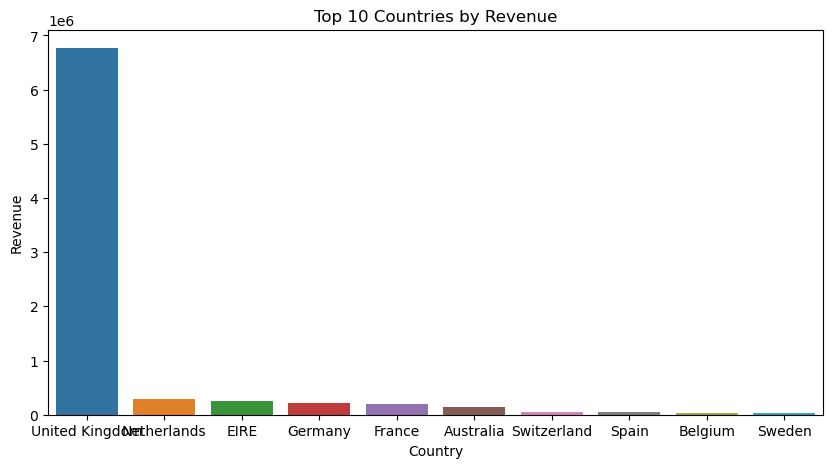

In [18]:
##Top countries by revenue
plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10).values)
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.show()

c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


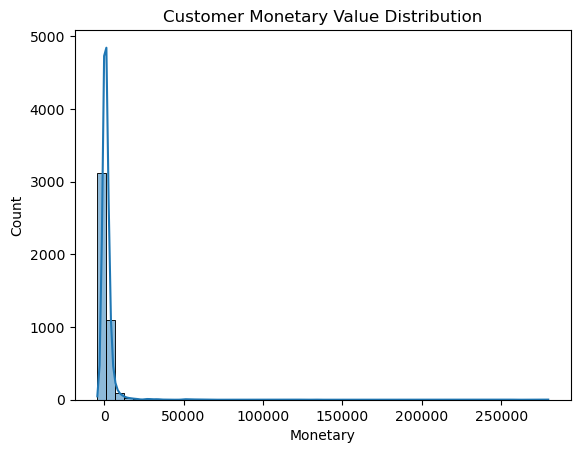

In [19]:
##Distribution of monetary value
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title('Customer Monetary Value Distribution')
plt.show()


In [22]:
##define churn
rfm['Churn'] = np.where(rfm['Recency'] > churn_threshold, 1, 0)
churn_threshold = 180  # days
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
##Insghts and export


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       254

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



In [20]:
##Insghts and export
df.to_csv('cleaned_ecommerce_data.csv', index=False)
rfm.to_csv('rfm_segments.csv', index=True)

In [24]:
rfm['churn'] = np.where(rfm['Recency'] > 180, 1, 0)
print('churn distribution:\n', rfm['churn'].value_counts())
rfm.head()

churn distribution:
 churn
0    3508
1     864
Name: count, dtype: int64


,Recency,Frequency,Monetary,Churn,churn
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,7,4310.00,0,0
12348.0,75,4,1797.24,0,0
12349.0,19,1,1757.55,0,0
12350.0,310,1,334.40,1,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Accuracy: 0.9992378048780488

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       259

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



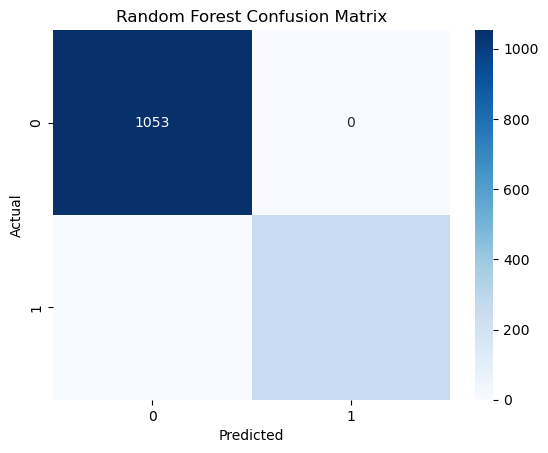

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

     Feature  Importance
0    Recency    0.886407
2   Monetary    0.058666
1  Frequency    0.054927


c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


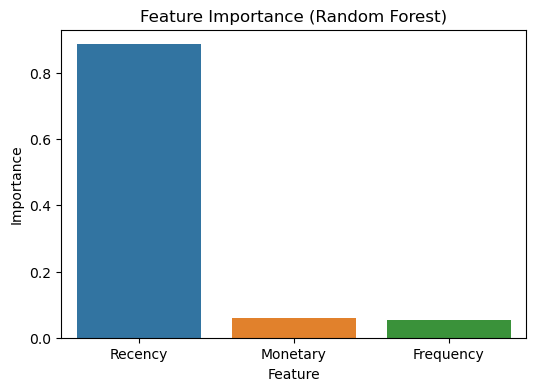

In [31]:
feature_importance = pd.DataFrame({
'Feature': X.columns,
'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

c:\Users\phyllis\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


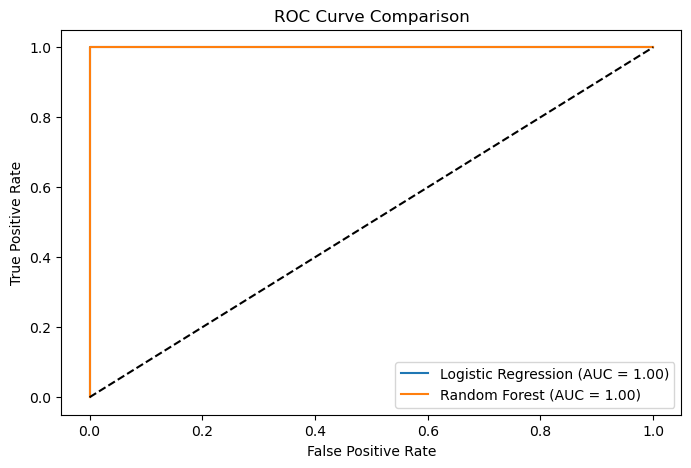

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
y_prob_log = model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [36]:
%pip install openpyxl

df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.to_excel('ecommerce_segmentation.xlsx', index=False)

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 656.4 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 930.9 kB/s eta 0:00:01
   ------------------------------- -------- 194.6/250.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 235.5/250.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 962.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### RECOMENDATION

1. Focus retention efforts on customers with high Recency (i.e., those who haven't purchased recently), as Recency is the most important churn predictor.

2. Consider targeted marketing campaigns for customers with low Frequency and Monetary values to encourage repeat purchases and higher spending.

3. Use the trained Random Forest model to periodically score customers and proactively identify those at risk of churning.

4. Analyze top countries and products to tailor promotions and inventory for high-value segments.

5. Regularly update the RFM analysis and churn model as new data arrives to keep insights relevant.